A Tendência é muito importante na presição a soma de sazonalidade mais tendência é igual a predição.

In [ ]:
!pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision

!pip install neuralprophet


In [ ]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

In [ ]:
#carregando df
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")

In [ ]:
df

,ds,y
0,2014-12-31,65.41
1,2015-01-01,62.09
2,2015-01-02,69.44
3,2015-01-03,65.22
4,2015-01-04,58.91
...,...,...
1457,2018-12-27,72.96
1458,2018-12-28,69.23
1459,2018-12-29,62.62
1460,2018-12-30,64.57


In [ ]:
#Model and predition
m = NeuralProphet(
    #Desativar pontos de tendência de mudança
    n_changepoints=0,
    #Desativa componentes de sazonalidade
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,

)

m.set_plotting_backend("plotly")
metrics = m.fit(df)
forecasts = m.predict(df)
m.plot(forecasts)

In [ ]:
m.plot_components(forecasts, components=["trend"])

In [ ]:
df_future = m.make_future_dataframe(df, periods=365, n_historic_predictions=True)

#predict the future
forecast = m.predict(df_future)

#Visualize the future
m.plot(forecast)

In [ ]:
#Model and predition
m = NeuralProphet(
    # Use default number of change trendpoints (10)
    # n_changepoints=0,
    # Disable seasonality components
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
)

m.set_plotting_backend("matplotlib")
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


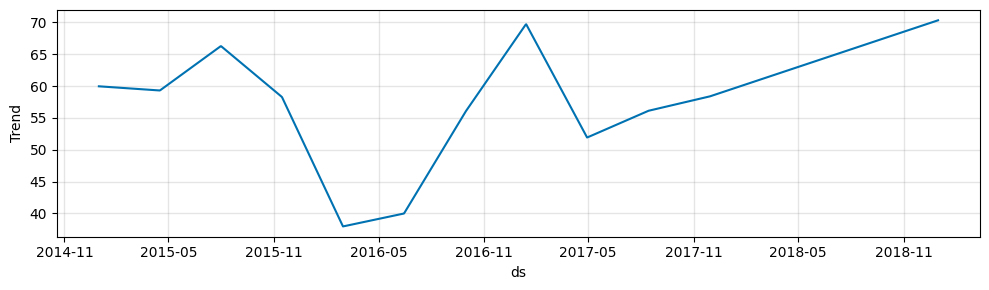

In [ ]:
m.plot_parameters(components=['trend'])

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.932% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.932% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 46it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


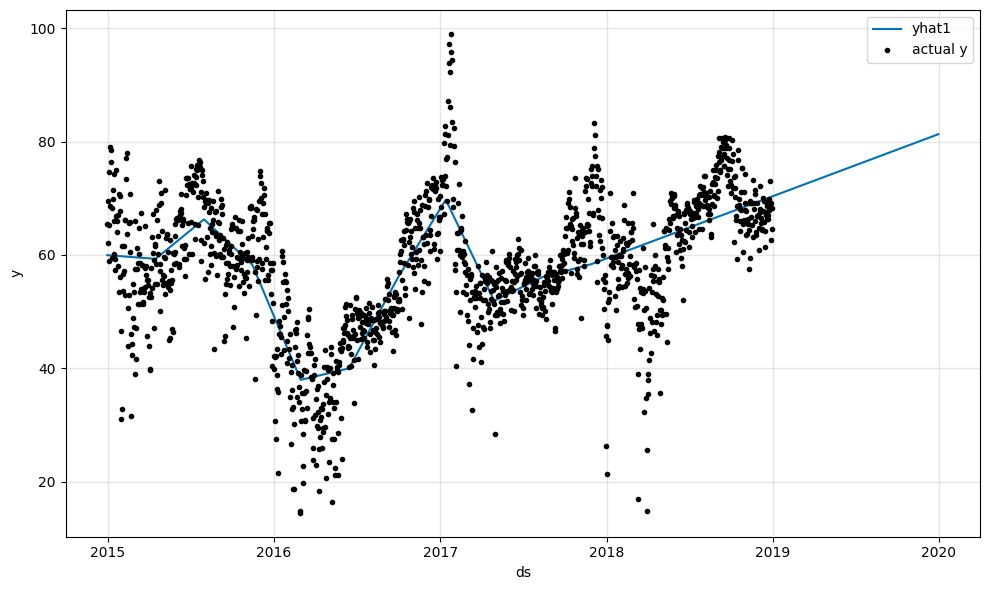

In [ ]:
df_future = m.make_future_dataframe(df, periods=365, n_historic_predictions=True)

#predict the future
forecast = m.predict(df_future)

#Visualize the future
m.plot(forecast)